<a href="https://colab.research.google.com/github/edtechequity/ml_fairness_toolkit/blob/master/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vetting a Data Set

This module is intended to provide a bare-bones starter kit for data validation for people not intimately familiar with machine learning. It provides some basic code and visualizations.

This module includes code to:

- Check for blind spots (**feature counts**)
- Check for race-correlated features (**feature correlation**)

### The ProPublica COMPAS Dataset

The dataset we're using as an example is from COMPAS (Correctional Offender Management Profiling for Alternative Sanctions), a commercial algorithm used by judges and parole officers for determining a criminal defendent's likelihood of reoffending (recidivism). This dataset is presented in both raw and sanitzed formats. For simplicity, we'll use the later.

You can download it from Kaggle [here](https://www.kaggle.com/danofer/compass/data#cox-violent-parsed_filt.csv). The file we'll be using is `propublica_data_for_fairml.csv`.

### How to Import Your Dataset
First, let's import a dataset. We recommend using our sample Propublica dataset first, then retrying some of this analysis with your own data.

You can upload your file using the "upload" button in the top left of Google Colab to begin. This code assumes a CSV or Pandas-compliant format.

The code below imports the data from the uploaded file.

In [0]:
import pandas as pd 

df = pd.read_csv('propublica_data_for_fairml.csv')

In [90]:
df[:5]

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0


## Checking for Blind Spots

Your dataset will have many **features** and, potentially, a **label**. The COMPAS dataset has several features (e.g., race and gender) as well as a label (whether the person reoffended within 2 years).

**Blind spots** occur where your dataset doesn't have examples of certain kinds of people. Without sufficient examples, the machine learning model might fail to learn about certain groups of people. For example, in the COMPAS dataset, there are zero examples of Native American women who *didn't* reoffend, which would heavily bias a naively-trained algorithm against this group.

This code helps you identify if you have "blind spots" in your dataset. Because the process requires manual investigation, this code is meant to be illustrative and not exhaustive.



In [0]:
# The following code will check for the presence of one or two boolean (0 or 1)
# variables and tell you how many positive and negative examples there are for
# that slice of the data set.

def print_feature_check(df, label, feat1, feat2=None):
  total_rows = df.shape[0]
  
  if feat2 is None:
    present_features = df.apply(lambda d: d[feat1] == 1, axis=1)
    positives = df.apply(lambda d: d[label] == 1 and d[feat1] == 1, axis=1)
    negatives = df.apply(lambda d: d[label] == 0 and d[feat1] == 1, axis=1)
  else:
    present_features = df.apply(lambda d: d[feat1] == 1 and d[feat2] == 1, axis=1)
    positives = df.apply(lambda d: d[label] == 1 and d[feat1] == 1 and d[feat2] == 1, axis=1)
    negatives = df.apply(lambda d: d[label] == 0 and d[feat1] == 1 and d[feat2] == 1, axis=1)
 
  num_present = len(present_features[present_features == True].index)
  num_positives = len(positives[positives == True].index)
  num_negatives = len(negatives[negatives == True].index)

  pct_present = round(100 * num_present / total_rows, 1)
  pct_positives = round(100 * num_positives / num_present, 1)
  pct_negatives = round(100 * num_negatives / num_present, 1)
  
  print('- There are ', num_present, ' samples, accounting for ', pct_present, '% of the dataset.', sep='')
  print('- Positive samples: ', num_positives, ', accounting for ', pct_positives, '% of in-class samples.', sep='')
  print('- Negative samples: ', num_negatives, ', accounting for ', pct_negatives, '% of in-class samples.', sep='')

### Examples for COMPAS Dataset

The code below runs through four examples, and explanations follow.

- **Example 1: Women.** You might ask yourself how many women were in this dataset and how many of them were labeled positive. Notably, women make up ~19% of the dataset and have a good number of samples of both positive and negative labels. 

- **Example 2: African American folks.** Next, you might look at the representation of African American people in this dataset. Notably, they make up ~51% of the dataset, a significant over-representation. However, there are a good number of samples of both positive and negative labels, so the model can generalize.

- **Example 3: African American women.** At this point, you might wonder how the intersection of the two above categories fare. Though African American women make up a small portion (8.9%) of the dataset, the model has sufficient positive and negative examples to learn.

- **Example 4: Native American women.** Lastly, there are only 2 Native American women in this dataset, both of whom reoffended. In the absence of other meaningful features, a naive machine learning model could end up significantly biased against Native American women, since it hasn't seen positive examples. **This is a significant red flag to an ML engineer.**

In [86]:
print('*** Example 1: Women ***')
print_feature_check(df, 'Two_yr_Recidivism', 'Female')

print ('\n*** Example 2: African American Folks ***')
print_feature_check(df, 'Two_yr_Recidivism', 'African_American')

print ('\n*** Example 3: African American Women ***')
print_feature_check(df, 'Two_yr_Recidivism', 'African_American', 'Female')

print ('\n*** Example 3: Native American Women ***')
print_feature_check(df, 'Two_yr_Recidivism', 'Native_American', 'Female')

*** Example 1: Women ***
- There are 1175 samples, accounting for 19.0% of the dataset.
- Positive samples: 413, accounting for 35.1% of in-class samples.
- Negative samples: 762, accounting for 64.9% of in-class samples.

*** Example 2: African American Folks ***
- There are 3175 samples, accounting for 51.4% of the dataset.
- Positive samples: 1661, accounting for 52.3% of in-class samples.
- Negative samples: 1514, accounting for 47.7% of in-class samples.

*** Example 3: African American Women ***
- There are 549 samples, accounting for 8.9% of the dataset.
- Positive samples: 203, accounting for 37.0% of in-class samples.
- Negative samples: 346, accounting for 63.0% of in-class samples.

*** Example 3: Native American Women ***
- There are 2 samples, accounting for 0.0% of the dataset.
- Positive samples: 2, accounting for 100.0% of in-class samples.
- Negative samples: 0, accounting for 0.0% of in-class samples.


Feel free to play around with the above code. You can investigate any pair of features by simply replacing the feature names in the above code.

## Checking for Race-Correlated Features

Depending on the law, protected classes like race probably don't belong in your feature set at all. However, you should be sure that you're not including features that highly correlate with this eliminated features. As an example, zip code is often highly correlated with race. 

This module will take a dataset and one feature that you choose and tell you how correlated the rest of the features are.

We do this by calculating two versions of correlation:
- **Perason's Correlation**, which is a measure of the linear relationship between two features.
- **Spearman's Correlation**, which is a measure of the potentially nonlinear relationship between two features.

Both metrics return a value between -1 and 1, where 0 means no correlation, -1 means they're exactly anticorrelated, and +1 means they're fully correlated.

If a feature correlation is close to +1 or -1, it means the model is likely to treat them as proxies for one another.

[This article](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/) by Jason Brownlee for Machine Learning Mastery does an excellent job of describing these metrics.


### Pearon's Correlation

The code below will generate Pearson's correlations for each pair of features.

For the COMPAS dataset example, the features are fairly independent of one another. 

**Red Flag Example:** However, you can see that the "score_factor" has a correlation of `0.27` with "African_American" and a negligible correlation with other races. This means that a higher score (and real-world penalty) correlates more with being African American than with other races, a definite red flag.

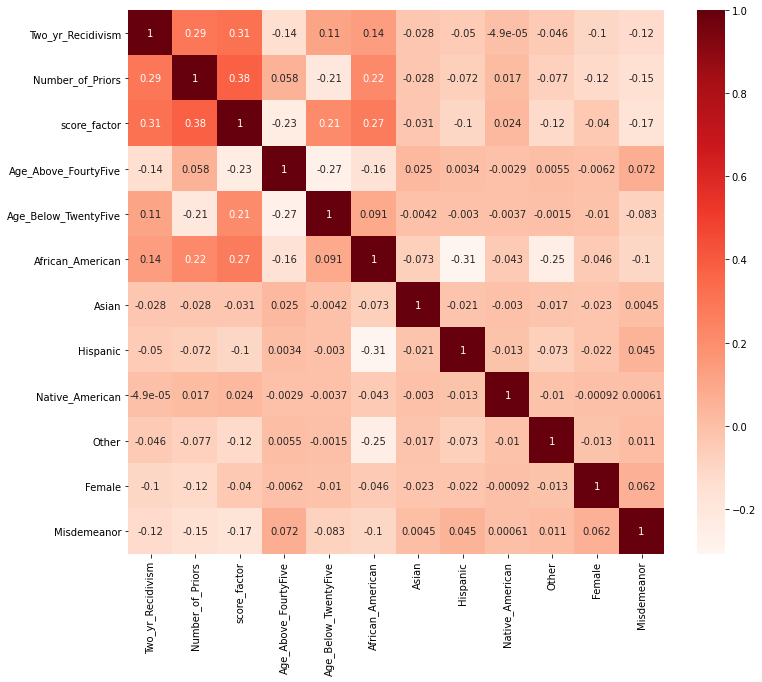

In [94]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Spearman's Correlation

The code below will generate Spearman's correlations for each pair of features.

For the COMPAS dataset, the analysis is roughly the same, but this might not hold true for your dataset.

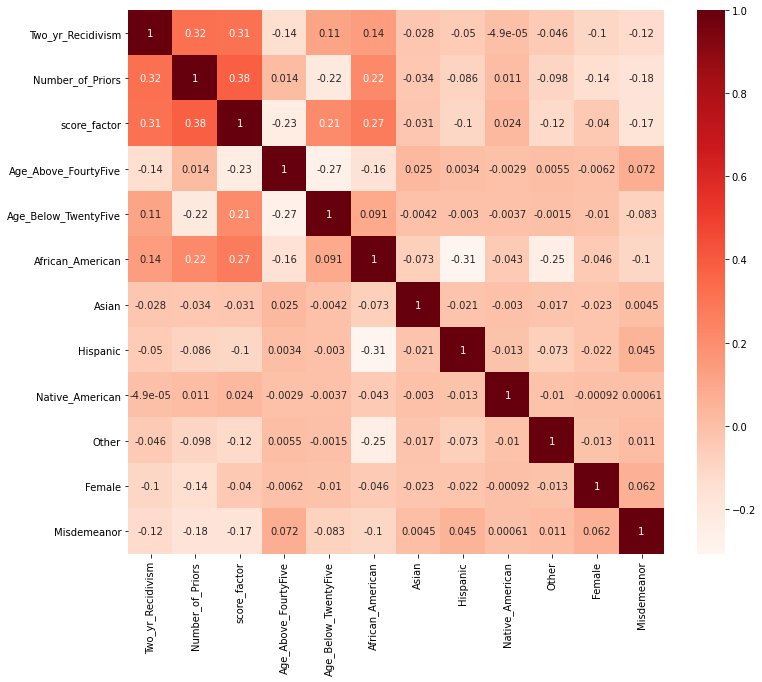

In [84]:
plt.figure(figsize=(12,10))
cor = df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()